In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import random

In [3]:
f = pd.read_csv('/Users/DericoDehnielsen/Downloads/players_20.csv')

In [4]:
f.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [5]:
f.shape

(18278, 104)

In [409]:
f['overall'].describe()

count    18278.000000
mean        66.244994
std          6.949953
min         48.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: overall, dtype: float64

In [421]:
df_players = f[f['player_positions'] != 'GK']
df_goalkeeper = f[f['player_positions'] == 'GK']
player_features = ['overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
goalkeepers_features = ['overall','gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']
df_player_features = df_players[player_features]

Text(0.5, 1.0, 'distribution of goalkeeper rating')

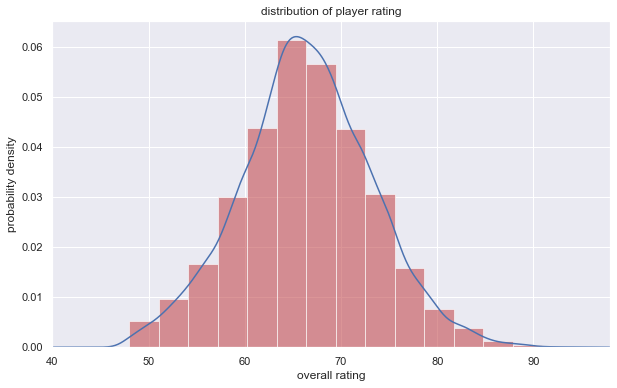

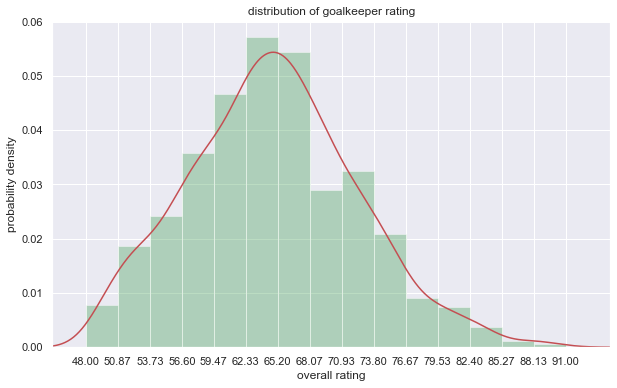

In [427]:
fig, ax = plt.subplots()

count, bin_edges = np.histogram(df_players['overall'])

df_players['overall'].plot(kind='hist',
                            color='r',
                             alpha=0.6,
                             bins = 15,

                             figsize=(10,6),
                             density=True,
                             ax=ax)

df_players['overall'].plot.density(ax=ax, xlim=(40,98))

plt.xlabel('overall rating')
plt.ylabel('probability density')
plt.title('distribution of player rating')

fig, ax1 = plt.subplots()

count, bin_edges = np.histogram(df_goalkeeper['overall'], 15)

df_goalkeeper['overall'].plot(kind='hist',
                             color='g',
                             alpha=0.4,
                             bins = 15,
                             xticks = bin_edges,
                             figsize=(10,6),
                             density=True,
                             ax=ax1)

df_goalkeeper['overall'].plot.density(ax=ax1, xlim=(45,95), color='r')

plt.xlabel('overall rating')
plt.ylabel('probability density')
plt.title('distribution of goalkeeper rating')

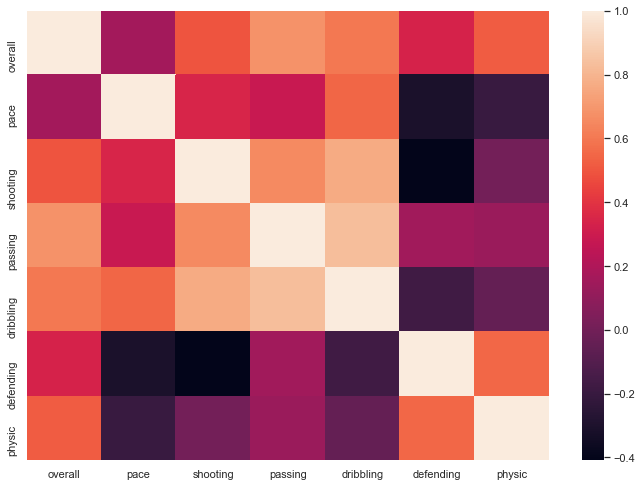

In [420]:
sns.heatmap(pd.DataFrame.corr(df_player_features))


In [413]:
# The heatmap shows a weak correlation between overall rating and the features
# One possible factor is player positions

df_strikers = f[f['player_positions'].str.contains('ST' or 'RW' or 'LW')]
df_midfielders = f[f['player_positions'].str.contains('CM' or 'CAM')]
df_defenders = f[f['player_positions'].str.contains('CB' or 'LB' or 'RB')]
df_goalkeepers = f[f['player_positions'] == 'GK']

In [422]:
df_str = df_strikers[player_features]
df_mid = df_midfielders[player_features]
df_def = df_defenders[player_features]
df_gk = df_goalkeepers[goalkeepers_features]

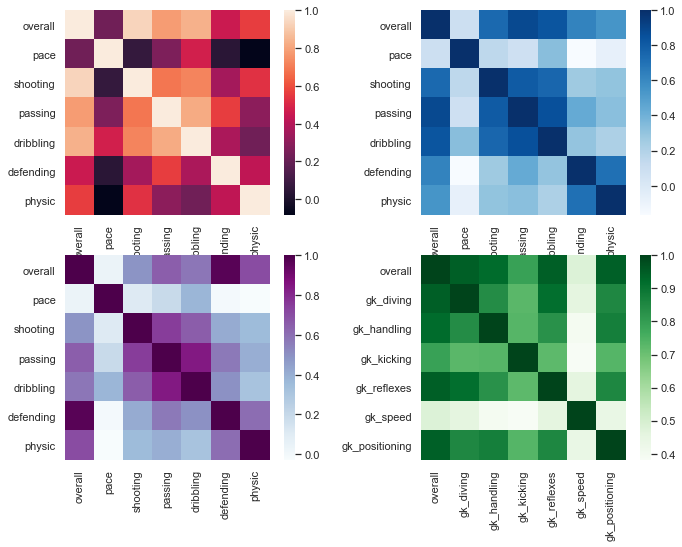

In [423]:
fig = plt.figure() 

ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

sns.heatmap(pd.DataFrame.corr(df_str), ax=ax0, square=True)
sns.heatmap(pd.DataFrame.corr(df_mid), ax=ax1, square=True, cmap="Blues")
sns.heatmap(pd.DataFrame.corr(df_def), ax=ax2, square=True, cmap="BuPu")
sns.heatmap(pd.DataFrame.corr(df_gk), ax=ax3, square=True, cmap="Greens")

plt.show()


In [281]:
# The heatmaps above show a better correlation than the previous one. However, pace and gk_speed seem to have weak correlation with overall rating.
# Removing pace and gk_speed from both parameters will give smaller error

p_features = ['overall', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
gk_features = ['overall','gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_positioning']

In [383]:
# Split the data into training dataset and testing dataset with test size of 30%

X_str = df_str[['shooting', 'passing', 'dribbling', 'defending', 'physic']]
y_str = df_str['overall']

X_mid = df_mid[['shooting', 'passing', 'dribbling', 'defending', 'physic']]
y_mid = df_mid['overall']

X_def = df_def[['shooting', 'passing', 'dribbling', 'defending', 'physic']]
y_def = df_def['overall']

X_gk = df_gk[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_positioning']]
y_gk = df_gk['overall']

e = 9999

X_train, X_test, y_train, y_test = train_test_split(X_str, y_str, test_size = 0.25, random_state = e)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mid, y_mid, test_size = 0.25, random_state = e)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_def, y_def, test_size = 0.25, random_state = e)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_gk, y_gk, test_size = 0.25, random_state = e)


In [384]:
linreg_str = LinearRegression()
linreg_mid = LinearRegression()
linreg_def = LinearRegression()
linreg_gk = LinearRegression()

In [385]:
linreg_str.fit(X_train, y_train)
linreg_mid.fit(X_train2, y_train2)
linreg_def.fit(X_train3, y_train3)
linreg_gk.fit(X_train4, y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [403]:
def predict_str(shooting, passing, dribbling, defending, physic):
    xy = linreg_str.predict([[shooting, passing, dribbling, defending, physic]])
    yy = df_players[df_players['overall'] == int(xy)]
    print(f"predicted overall rating is {int(xy)}")

def predict_mid(shooting, passing, dribbling, defending, physic):
    xy = linreg_mid.predict([[shooting, passing, dribbling, defending, physic]])
    yy = df_midfielders[df_midfielders['overall'] == int(xy)]
    print(f"predicted overall rating is {int(xy)}")
    
def predict_def(shooting, passing, dribbling, defending, physic):
    xy = linreg_def.predict([[shooting, passing, dribbling, defending, physic]])
    yy = df_defenders[df_defenders['overall'] == int(xy)]
    print(f"predicted overall rating is {int(xy)}")

def predict_gk(gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_positioning):
    xx = linreg_gk.predict([[gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_positioning]])
    yt = df_goalkeepers[df_goalkeepers['overall'] == int(xx)]
    print(f"predicted overall rating is {int(xy)}")


In [404]:
def predict_fifa_rating():
    tt = input("input player's position (striker, midfielder, defender, goalkeeper): ")
    if tt == 'striker':
        shooting = int(input("input player's shooting score: "))
        passing = int(input("input player's passing score: "))
        dribbling = int(input("input player's dribbling score: "))
        defending = int(input("input player's defending score: "))
        physic = int(input("input player's physic score: "))
        print('--------------------')
        try:
            return predict_str(shooting, passing, dribbling, defending, physic) 
        except:
            print('input out of range')
    elif tt == 'midfielder':
        shooting = int(input("input player's shooting score: "))
        passing = int(input("input player's passing score: "))
        dribbling = int(input("input player's dribbling score: "))
        defending = int(input("input player's defending score: "))
        physic = int(input("input player's physic score: "))
        print('--------------------')
        try:
            return predict_mid(shooting, passing, dribbling, defending, physic)
        except:
            print('input out of range')
    elif tt == 'defender':
        shooting = int(input("input player's shooting score: "))
        passing = int(input("input player's passing score: "))
        dribbling = int(input("input player's dribbling score: "))
        defending = int(input("input player's defending score: "))
        physic = int(input("input player's physic score: "))
        print('--------------------')
        try:
            return predict_def(shooting, passing, dribbling, defending, physic)
        except:
            print('input out of range')
    elif tt == 'goalkeeper':
        gk_diving = int(input("input goalkeeper's diving score: "))
        gk_handling = int(input("input goalkeeper's handling score: "))
        gk_kicking = int(input("input goalkeeper's kicking score: "))
        gk_reflexes = int(input("input goalkeeper's reflexes score: "))
        gk_speed = int(input("input goalkeeper's speed score: "))
        gk_positioning =int(input("input goalkeeper's positioning score: "))
        print('--------------------')
        try:
            return predict_gk(gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_positioning)
        except:
            print('input out of range')
    else:
        print(f'{tt} is not valid')

In [405]:
# Check the mean squared error for all models

y_pred1 = linreg_str.predict(X_test)
y_pred2 = linreg_mid.predict(X_test2)
y_pred3 = linreg_def.predict(X_test3)
y_pred4 = linreg_gk.predict(X_test4)

mse1 = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred1)),2)
mse2 = round(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)),2)
mse3 = round(np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)),2)
mse4 = round(np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)),2)

print(f'The mean squared error for linreg_str = {mse1}, linreg_mid = {mse2}, linreg_def = {mse3}, linreg_gk = {mse4}')

The mean squared error for linreg_str = 1.46, linreg_mid = 2.08, linreg_def = 1.17, linreg_gk = 0.77


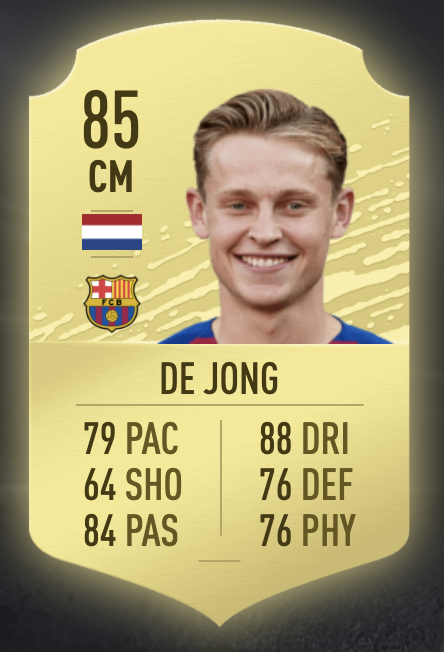

In [437]:
# predict Frenkie De Jong's fifa 20 overall rating

from PIL import Image

jj = Image.open('/Users/DericoDehnielsen/Desktop/dejong.jpg')
jj

In [438]:
predict_fifa_rating()

input player's position (striker, midfielder, defender, goalkeeper): midfielder
input player's shooting score: 64
input player's passing score: 84
input player's dribbling score: 88
input player's defending score: 76
input player's physic score: 76
--------------------
predicted overall rating is 85


In [440]:
print(':)')

:)
